# Finding the where the foot hits the gound

In [5]:
import os
# Check cwd
# os.chdir('/home/atom/cvlab/BS-thesis/') 
os.chdir('/home/member/github/BS-thesis') 
# BS-thesis should be root
print(os.getcwd())

/home/member/github/BS-thesis


In [14]:
# Dependencies
import glob
import my_pkg.dataset
import matplotlib.pyplot as plt
from matplotlib.text import Text
from matplotlib import cm, colors
import numpy as np

from scipy.constants import g
from functools import partial
from torch.utils.data import Dataset, DataLoader

In [15]:
# reloading stuff
import importlib
importlib.reload(my_pkg.dataset);

## Read the data

In [16]:
pose_paths = glob.glob('./data/marker/*.csv')
grf_paths = glob.glob('./data/GRF/*.csv')
info_path = './data/info.xlsx'
dataset = my_pkg.dataset.SLJDataset(pose_paths, grf_paths, info_path)

## Plot a frame with Numbers

前足部・中足部・丹状骨・第2，5中足骨底・第１,2,5中足骨頭を使用して，着地時間を求める．
![](./assets/imgs/markers.png)

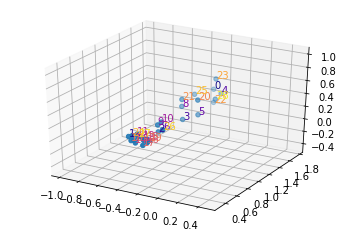

In [17]:
from mpl_toolkits.mplot3d import Axes3D

def axisEqual3D(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)
        
def annotate3D(X, Y, Z, ax, idxs, color=None):
    for i, idx in enumerate(idxs):
        x, y, z = X[idx], Y[idx], Z[idx]
        c = cm.get_cmap('plasma')(i/len(idxs)) if color == None else color
        ax.text(x * (1 + 0.01), y * (1 + 0.01) , z * (1 + 0.01),  text=idx, s=0.5, color=c)


# Plotting the full body
pose, *_ = dataset[0].values()

X, Y, Z = pose[0].T
idxs = range(len(X))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)

axisEqual3D(ax)
annotate3D(X, Y, Z, ax, idxs)

(1601, 29, 3) (1085, 29, 3)


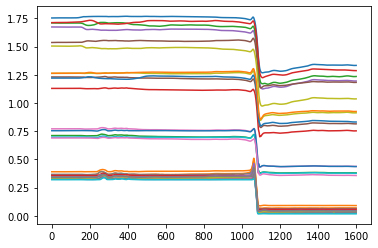

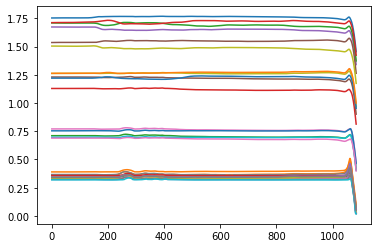

In [32]:
pose, trunc, *_ = dataset[0].values()
print(pose.shape, trunc.shape)

plt.plot(pose[:,:,1])
plt.show()

plt.plot(trunc[:,:,1])
plt.show()

<IPython.core.display.Javascript object>


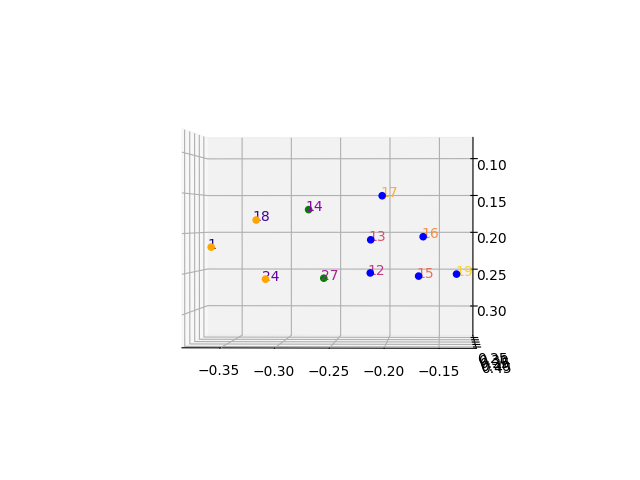

In [10]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the foot
# 後足部 Orange
# 踵骨隆起・腓骨滑車・載距突起
idxs1 = [1, 18, 24]
ax.scatter(X[idxs1], Y[idxs1], Z[idxs1], zdir='z', c='orange', alpha=1)

# 中足部 Green
# 丹状骨
idxs2 = [14, 27]
ax.scatter(X[idxs2], Y[idxs2], Z[idxs2], zdir='z', c='Green', alpha=1)

# 前足部 Blue
# 第2，5中足骨底・第１,2,5中足骨頭
idxs3 = [12, 13, 15, 16, 17, 19]
ax.scatter(X[idxs3], Y[idxs3], Z[idxs3], zdir='z', c='blue', alpha=1)

foot_idxs = idxs1+idxs2+idxs3
annotate3D(X, Y, Z, ax, foot_idxs)
axisEqual3D(ax)

## Before and after landing

**Landing doesn't mean y=0**

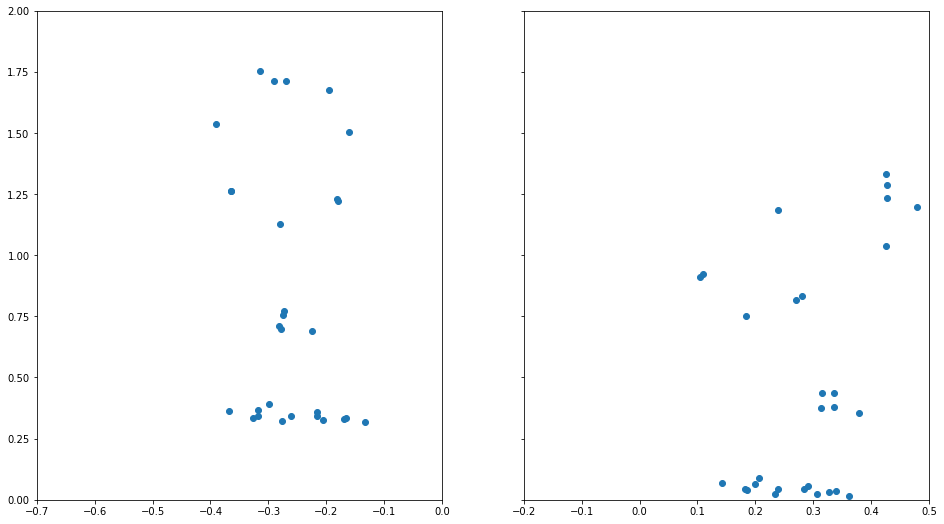

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 9))
plt.ylim(0, 2)

x, y, z = pose[0].T
ax1.scatter(x, y)
ax1.set_xlim(-0.7, 0)

x, y, z = pose[-1].T
ax2.scatter(x, y)
ax2.set_xlim(-0.2, 0.5)
plt.plot();

### Foot position over time

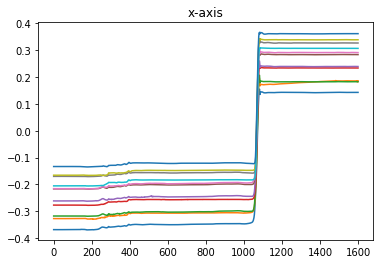

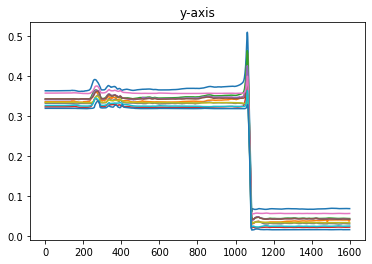

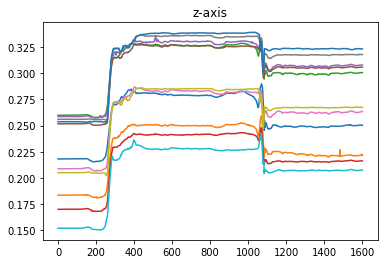

In [8]:
%matplotlib inline
pose, *_ = dataset[0].values()

plt.plot(pose[:, foot_idxs, 0])
plt.title('x-axis')
plt.show()

plt.plot(pose[:, foot_idxs, 1])
plt.title('y-axis')
plt.show()

plt.plot(pose[:, foot_idxs, 2])
plt.title('z-axis')
plt.show()

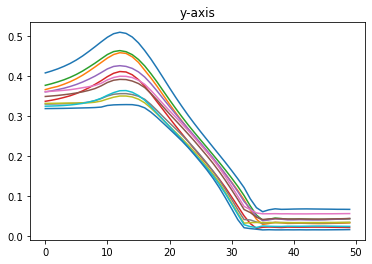

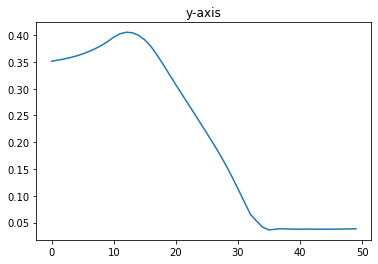

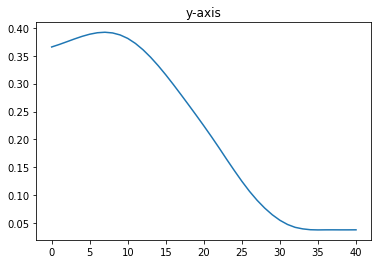

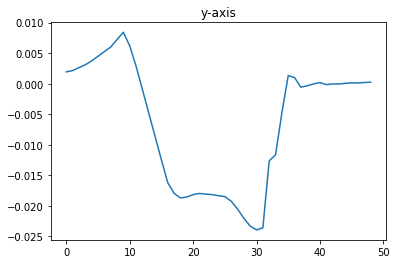

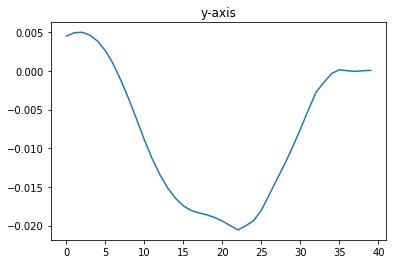

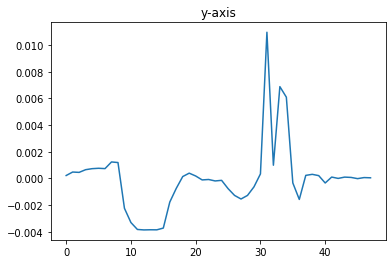

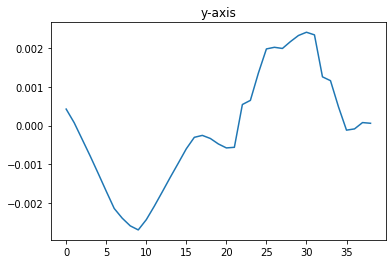

In [9]:
# zoom in
plt.plot(pose[1050:1100, foot_idxs, 1])
plt.title('y-axis')
plt.show()

# average
plt.plot(np.average(pose[1050:1100, foot_idxs, 1], axis=1))
plt.title('y-axis')
plt.show()

# moving average of average
n = 10
w = [1.0/n]*n
plt.plot(np.convolve(np.average(pose[1050:1100, foot_idxs, 1], axis=1), w[::-1], 'valid'))
plt.title('y-axis')
plt.show()

# differentiate average
plt.plot(np.diff(np.average(pose[1050:1100, foot_idxs, 1], axis=1)))
plt.title('y-axis')
plt.show()

# differentiate moving average of average
plt.plot(np.diff(np.convolve(np.average(pose[1050:1100, foot_idxs, 1], axis=1), w[::-1], 'valid')))
plt.title('y-axis')
plt.show()

# 2nd order differentiate average
plt.plot(np.diff(np.average(pose[1050:1100, foot_idxs, 1], axis=1),2))
plt.title('y-axis')
plt.show()

# 2nd order differentiate moving average of average
plt.plot(np.diff(np.convolve(np.average(pose[1050:1100, foot_idxs, 1], axis=1), w[::-1], 'valid'),2))
plt.title('y-axis')
plt.show()

### Finding land time

See appendix for details.

39
490
39


<IPython.core.display.Javascript object>


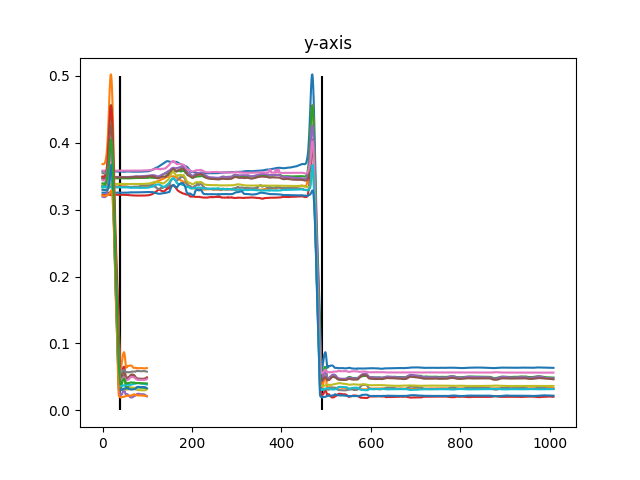

39
39
[0.33934227 0.33919945 0.33906882 0.33904164 0.33913473 0.33938627
 0.33977827 0.34065745 0.34165    0.34347245 0.34630109 0.35014164
 0.35496336 0.36090564 0.36804982 0.37654536 0.38645473 0.39608927
 0.40257473 0.40484309 0.40237318 0.39443073 0.38130273 0.36309845
 0.34117027 0.31757464 0.29295964 0.26773327 0.24254209 0.21880736
 0.19740764 0.17722336 0.15783236 0.13749982 0.11590636 0.09364345
 0.07064755 0.05959409 0.05131945 0.04401136 0.03920364 0.03890182
 0.04019573 0.04172373 0.043053   0.04475309 0.04638491 0.04729045
 0.04756573 0.04687936 0.04526264 0.04293336 0.04033636 0.04005082
 0.04044955 0.04044955 0.04084718 0.040898   0.04079782 0.04094555
 0.04113209 0.04134791 0.04149782 0.04163    0.04176945 0.04175209
 0.04170609 0.041546   0.04152709 0.041597   0.04155182 0.04146427
 0.04132609 0.04115636 0.04098164 0.04091591 0.040935   0.04101527
 0.04094227 0.040865   0.04088745 0.04086127 0.04085055 0.04076673
 0.040692   0.04067818 0.04062491 0.040557   0.04056373 

In [12]:
def land_time(pose, n=20):
    # air time
    mx = 0.44416272727272726
    t = np.ceil(np.sqrt(2*(mx+0.3)/g)*100).astype(int)
    print(t)
    w = [1.0/n]*n
    foot_ave = np.average(pose[:, foot_idxs, 1], axis=1)
    smoothed = np.convolve(foot_ave, w[::-1], 'valid')
    
    jump_time = np.argmax(smoothed)
    land_time = jump_time+np.argmin(smoothed[jump_time:jump_time+t])
    return land_time

pose, *_ = dataset[6].values()

print(land_time(pose))
plt.vlines(land_time(pose), ymin=0, ymax=0.5)
plt.plot(pose[:, foot_idxs, 1])
plt.title('y-axis')
plt.show()

plt.vlines(land_time(pose)-450, ymin=0, ymax=0.5)
plt.plot(pose[450:550, foot_idxs, 1])
plt.title('y-axis')
plt.show()

plt.vlines(land_time(pose)-450, ymin=0, ymax=0.5)
plt.plot(np.average(pose[450:550, foot_idxs, 1], axis=1))
plt.title('y-axis')
plt.show()
print(np.average(pose[450:550, foot_idxs, 1], axis=1))


In [13]:

mx = 0
for i in range(len(dataset)):
    pose, *_ = dataset[i].values()
    foot_ave = np.average(pose[:, foot_idxs, 1], axis=1)
    mx = max(mx, max(foot_ave))

print(mx)

# air time
mx = 0.44416272727272726
t = np.sqrt(2*(mx+0.3)/g)

0.44416272727272726


In [16]:
dataset.get_pose(dataset.pose_paths[0])

array([[[-0.314518,  1.754096,  0.274072],
        [-0.367979,  0.363426,  0.218113],
        [-0.281393,  0.711034,  0.133815],
        ...,
        [-0.224122,  0.68951 ,  0.191455],
        [-0.261152,  0.341172,  0.258539],
        [-0.161449,  1.505135,  0.279477]],

       [[-0.314506,  1.754143,  0.274038],
        [-0.367961,  0.363416,  0.21805 ],
        [-0.281454,  0.711059,  0.133845],
        ...,
        [-0.224185,  0.689516,  0.191461],
        [-0.261192,  0.341191,  0.258557],
        [-0.161527,  1.505107,  0.279502]],

       [[-0.314495,  1.754191,  0.274004],
        [-0.367942,  0.363406,  0.217987],
        [-0.281516,  0.711085,  0.133875],
        ...,
        [-0.224248,  0.689522,  0.191467],
        [-0.261233,  0.341211,  0.258576],
        [-0.161605,  1.505078,  0.279528]],

       ...,

       [[ 0.425749,  1.33322 ,  0.190084],
        [ 0.142464,  0.069082,  0.250244],
        [ 0.335163,  0.379898,  0.175126],
        ...,
        [ 0.37866 ,  0.356

In [ ]:
### Checking for each jump

for i in range(len(dataset)):
    pose, *_ = dataset[i].values()
    foot_ave = np.average(pose[:, foot_idxs, 1], axis=1)
    plt.vlines(land_time(pose, n=10), ymin=0, ymax=0.5)
    plt.plot(foot_ave)

    plt.title(f'y-axis {i}')
    plt.show()


## Nice plot of foot

In [18]:
pose[:100].shape

(100, 29, 3)